

# Project: No-show appointments

><b>Student: Ailin Valdes <br>
>Country: Argentina</b>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

><b> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 
</b>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [27]:
# Load dataset 

df=pd.read_csv("noshowappointments.csv")

In [28]:
# Print out a few lines

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [29]:
# Check the shape and info of the data

df.shape

(110527, 14)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
## There isn't null objects on the dataset

In [31]:
## Rename columns to CamelCase form

df.rename(columns={"AppointmentID":"AppointmentId","Hipertension":"Hypertension","SMS_received":"SmsReceived","No-show":"NoShow"},inplace=True)
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SmsReceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [32]:
## Check unique values 

print("Unique values from Gender:\n", df["Gender"].unique())
print("Unique values from Scholarship:\n", df["Scholarship"].unique())
print("Unique values from Hypertension:\n", df["Hypertension"].unique())
print("Unique values from Diabetes:\n", df["Diabetes"].unique())
print("Unique values from Alcoholism:\n", df["Alcoholism"].unique())
print("Unique values from Handcap:\n", df["Handcap"].unique())
print("Unique values from SMS_received:\n", df["SmsReceived"].unique())
print("Unique values from No Show:\n", df["NoShow"].unique())

Unique values from Gender:
 ['F' 'M']
Unique values from Scholarship:
 [0 1]
Unique values from Hypertension:
 [1 0]
Unique values from Diabetes:
 [0 1]
Unique values from Alcoholism:
 [0 1]
Unique values from Handcap:
 [0 1 2 3 4]
Unique values from SMS_received:
 [0 1]
Unique values from No Show:
 ['No' 'Yes']


In [33]:
## Check for duplicates

df.duplicated().sum()

0

### Correct Datatypes

In [34]:
## Correct datatypes from object to datetime

df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"]).dt.date.astype("datetime64[ns]")

In [35]:
## Correct datatypes from object to datetime

df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"]).dt.date.astype("datetime64[ns]")

In [36]:
## Create column Waiting Time. Represents the days that patient have to wait to their appointment. 
## Correct datatypes from date to int

df["WaitingTime"]=df["AppointmentDay"]-df["ScheduledDay"]
df["WaitingTime"] = df["WaitingTime"].dt.days.astype("int")

### Data Cleaning 

In [37]:
## Delete columns not relevant for the analysis

df.drop(["PatientId","AppointmentId"], axis=1, inplace=True)

In [38]:
## Drop errors in the dataset: Age can't be minor than zero.  

df.drop(df[df["Age"]<0].index,axis=0,inplace=True)

In [39]:
## Drop errors in the dataset: Waiting time cant be minor than zero. 

df.drop(df[df["WaitingTime"]<0].index,axis=0,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the relation between No show and Waiting time?)

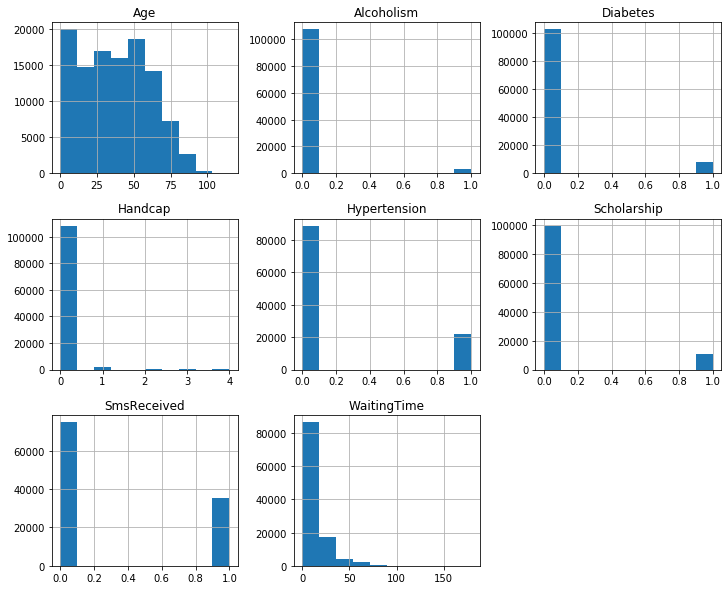

In [42]:
## First look at the dataset 

df.hist(figsize=(12,10));

In [43]:
no_attend=df.NoShow=="Yes"
attend=df.NoShow=="No"

In [44]:
df.WaitingTime[no_attend].mean()

15.835484449224701

In [45]:
df.WaitingTime[attend].mean()

8.754758692620767

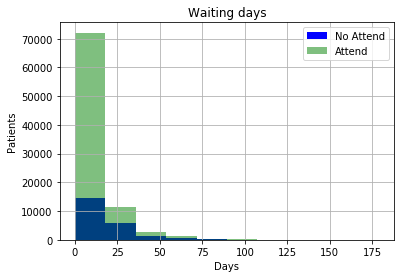

In [55]:
df.WaitingTime[no_attend].hist(alpha=1,color="b",label="No Attend")
df.WaitingTime[attend].hist(alpha=0.5,color="g",label="Attend")
plt.title("Waiting days")
plt.ylabel("Patients")
plt.xlabel("Days")
plt.legend();
    

> On average no attend (no show) is higher when waiting days are higher

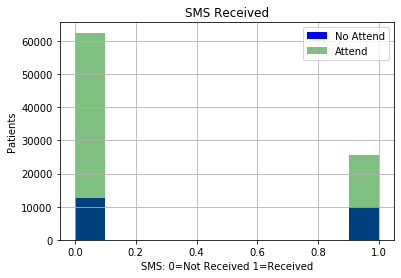

In [59]:
df.SmsReceived[no_attend].hist(alpha=1,color="b",label="No Attend")
df.SmsReceived[attend].hist(alpha=0.5,color="g",label="Attend")
plt.title("SMS Received")
plt.ylabel("Patients")
plt.xlabel("SMS: 0=Not Received 1=Received")
plt.legend();

> People aren't influenced by the arrival of an SMS. They mostly attend without receiving a message.

### Research Question 2  (What is the relation between No show and Gender?)

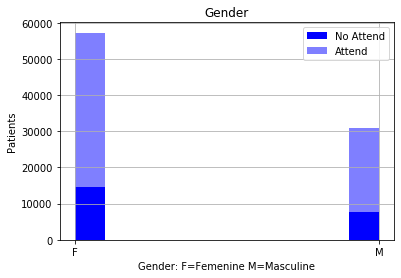

In [58]:
df.Gender[no_attend].hist(alpha=1,color="b",label="No Attend")
df.Gender[attend].hist(alpha=0.5,color="b",label="Attend")
plt.title("Gender")
plt.ylabel("Patients")
plt.xlabel("Gender: F=Femenine M=Masculine")
plt.legend();

In [263]:
df.groupby(["Gender"])["NoShow"].value_counts()

Gender  NoShow
F       No        57246
        Yes       14594
M       No        30962
        Yes        7725
Name: NoShow, dtype: int64

> Women has more appointments than men. Anyway the relationship "no-show/show" is the same in both sex (approx. 20% no-show) 

### Research Question 3  (What is the relation between No show and Age?)

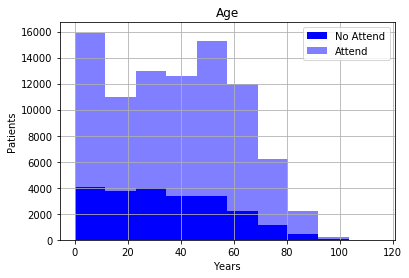

In [61]:
df.Age[no_attend].hist(alpha=1,color="b",label="No Attend")
df.Age[attend].hist(alpha=0.5,color="b",label="Attend")
plt.title("Age")
plt.ylabel("Patients")
plt.xlabel("Years")
plt.legend();

In [24]:
df.Age[no_attend].mean()

34.31787218786412

In [25]:
df.Age[attend].mean()

37.790504154999034

> The mean of No show and Show is similar. Its visible in the graph that people who attends the most are between 0-10 and 50-60 years approx.

## Conclusions


It can be concluded from the graphics, that the people who attend the doctor have the closest appointments. 
No relationship found between Gender and No show to appointments. Anyway, women have more medical appointments. 
Although the average Age is similar in No show and Show appointments, it can be seen from the graphics that younger and older people are the main ones to go to medical appointments mostly.

In [68]:
df["ScheduledDay"].min()

Timestamp('2015-11-10 00:00:00')

In [67]:
df["ScheduledDay"].max()

Timestamp('2016-06-08 00:00:00')

I think the data isn't sufficient because it doesn't take into account the whole year. The minimun date in this dataset is October 2015 and the maximum is June 2016. That lefts out Winter that I believe is the season with more illnesses. Having the Winter data would give us more information about the behavior of the patients on the studied zone.

One of the major difficulties for me in this project was determining what had value or not in the dataset.